___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [3]:
df= pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.shape

(17414, 10)

In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

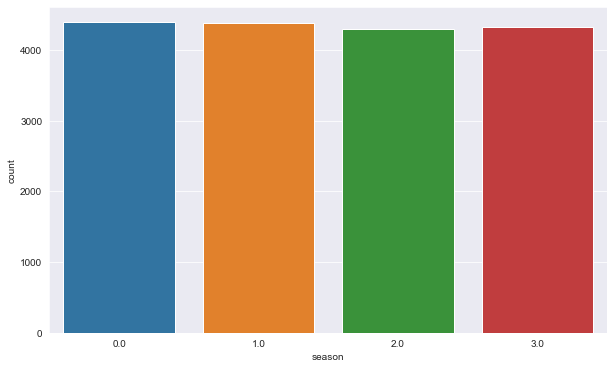

In [6]:
# season
plt.figure(figsize=(10,6))
sns.countplot(x='season',data=df)

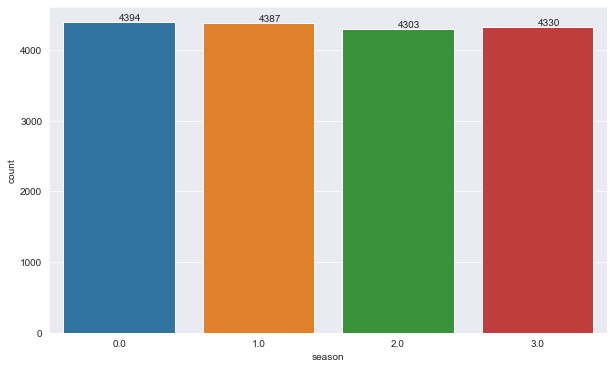

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.4, p.get_height()+20))

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

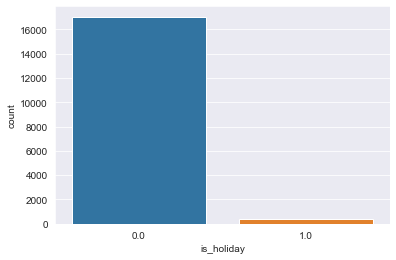

In [8]:
# is_holiday
sns.countplot(x='is_holiday', data=df)

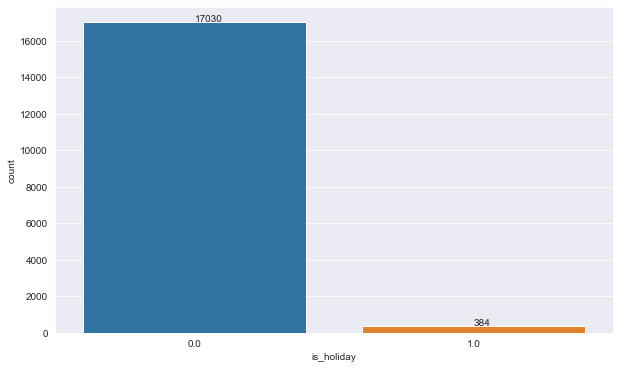

In [9]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='is_holiday',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.4, p.get_height()+20))

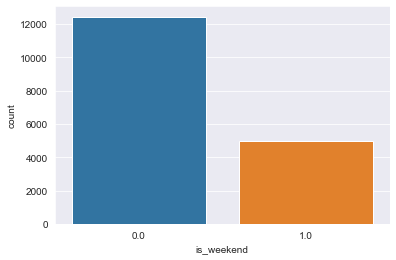

In [12]:
# is_weekend
sns.countplot(x='is_weekend', data=df);


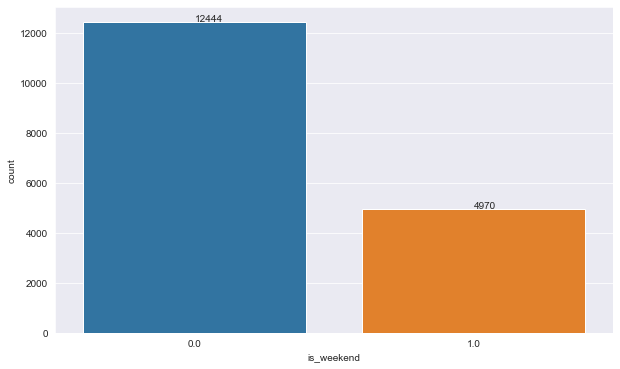

In [13]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='is_weekend',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.4, p.get_height()+20))

<AxesSubplot:xlabel='weather_code', ylabel='count'>

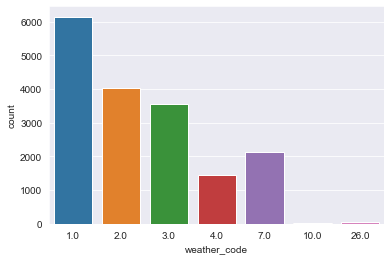

In [14]:
# weather_code
sns.countplot(x='weather_code', data=df)


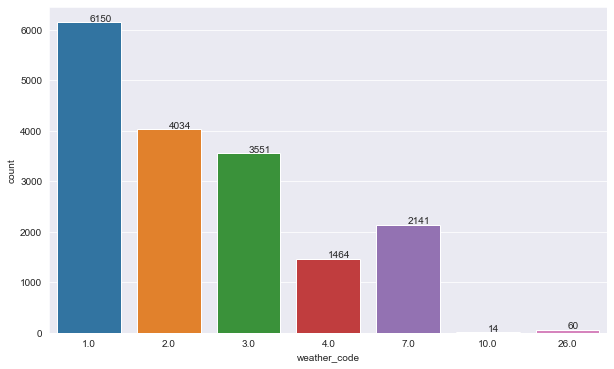

In [15]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='weather_code',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.4, p.get_height()+20))

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [21]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [28]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [30]:
f=lambda x: x.strftime('%Y-%m')

In [31]:
df['year-month'] =f(df.index)

In [32]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01


In [33]:
df['year']= df.index.year

In [34]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015


In [36]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='timestamp', length=17414)

In [35]:
df['month']=df.index.month

In [37]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1


In [42]:
df.index.day

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='timestamp', length=17414)

In [43]:
df['day_of_month']=df.index.day

In [44]:
df['day_of_week']=df.index.dayofweek

In [45]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=17414)

In [46]:
df['hour']=df.index.hour

In [47]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

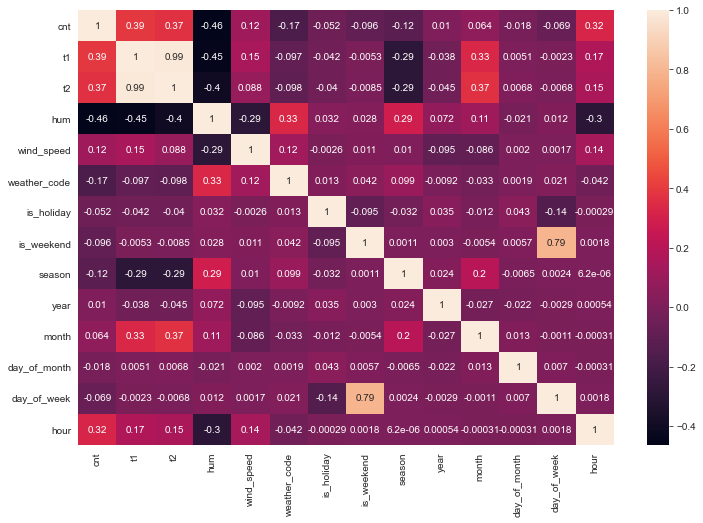

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

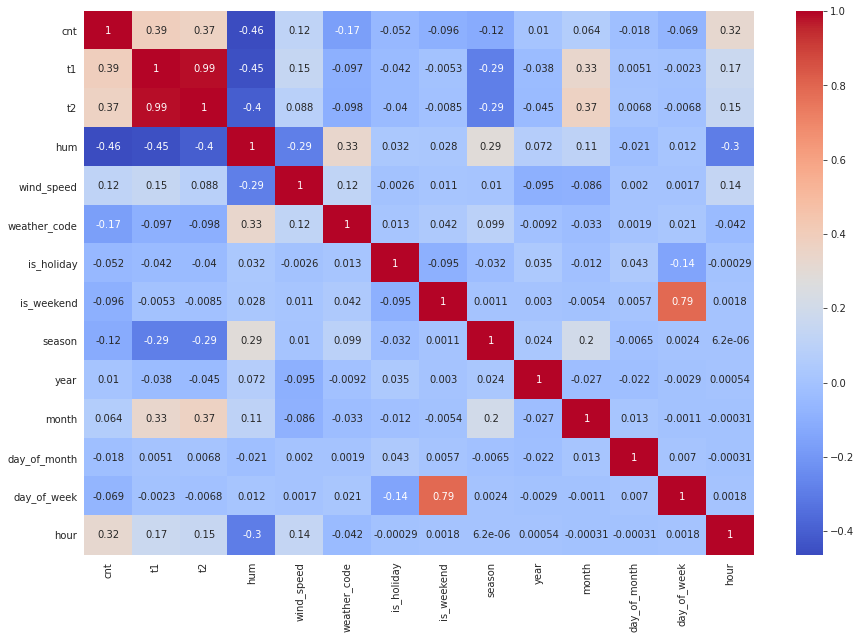

In [ ]:
# for all variables 


In [57]:
df_corr_cnt = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)

In [58]:
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


<AxesSubplot:>

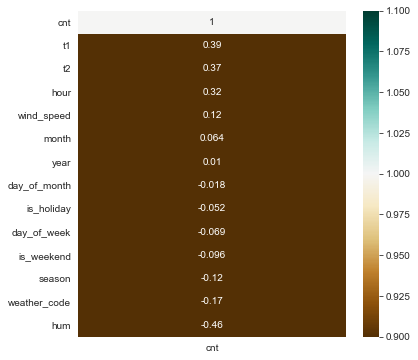

In [65]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr_cnt,vmin=1,vmax=1,annot=True,cmap='BrBG')

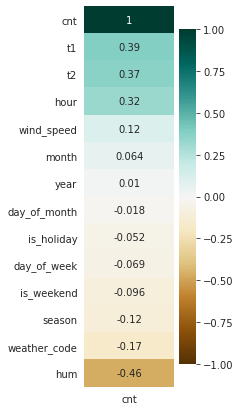

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

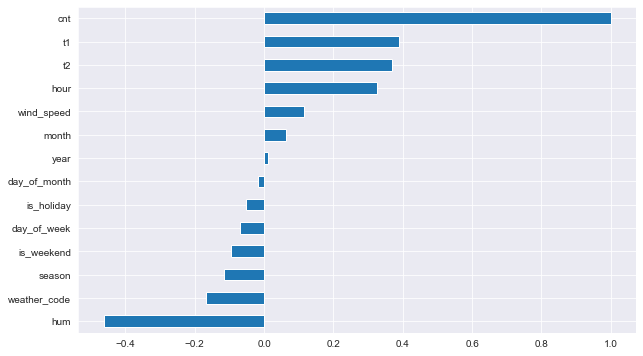

In [68]:
#with pandas
plt.figure(figsize=(10,6))
df.corr()['cnt'].sort_values().plot.barh()

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

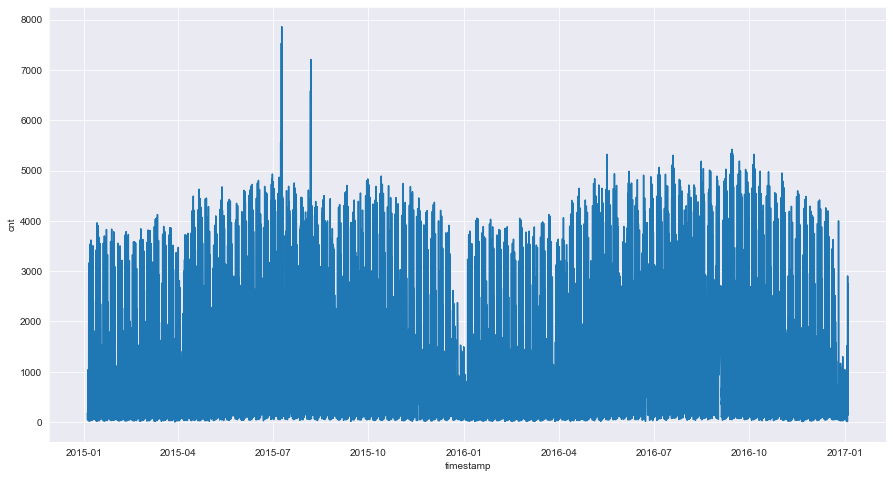

In [72]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.index,y='cnt', data=df)

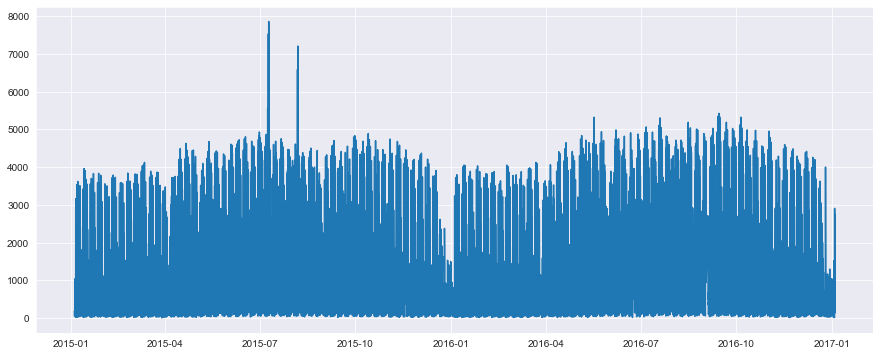

In [74]:
plt.figure(figsize=(15,6))
plt.plot(df['cnt'])

In [75]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [80]:
df_sum = pd.DataFrame(df.groupby(['year-month'])['cnt'].sum())

In [81]:
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


<AxesSubplot:xlabel='year-month', ylabel='cnt'>

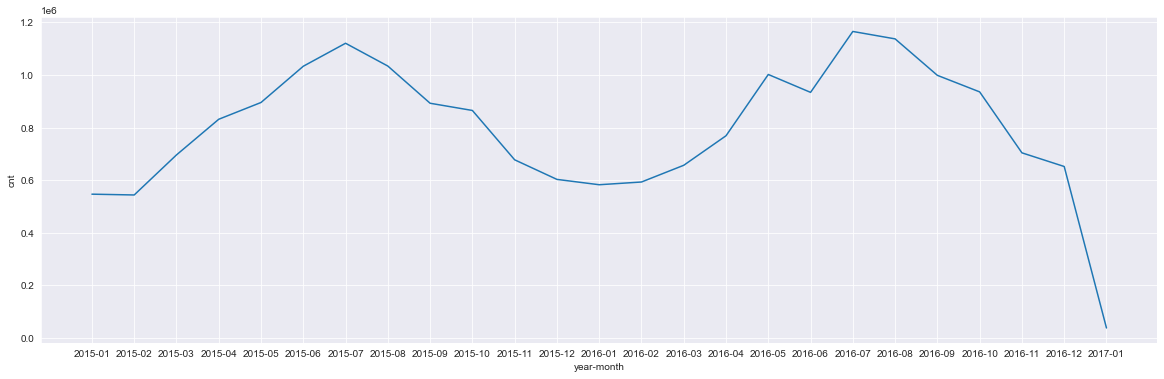

In [83]:
plt.figure(figsize=(20,6))
sns.lineplot(x='year-month',y='cnt',data=df_sum)

<AxesSubplot:xlabel='month', ylabel='cnt'>

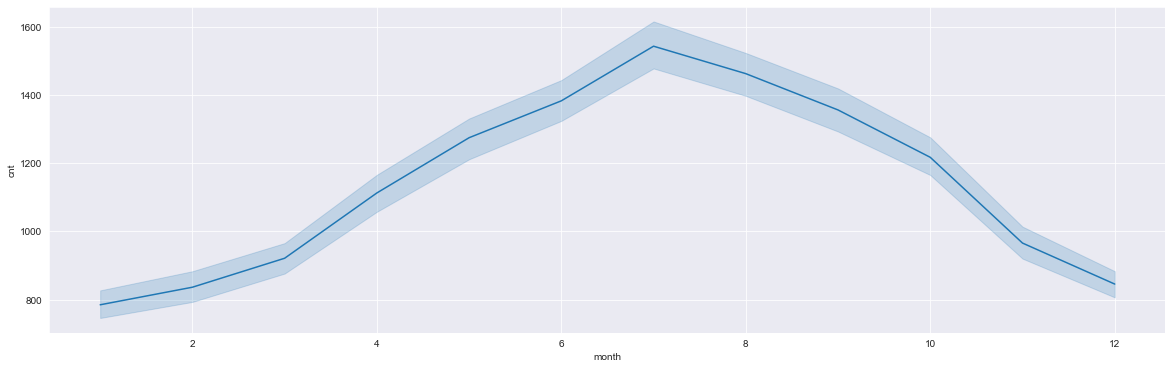

In [85]:
# with lineplot
plt.figure(figsize=(20,6))
sns.lineplot(x='month',y='cnt',data=df)

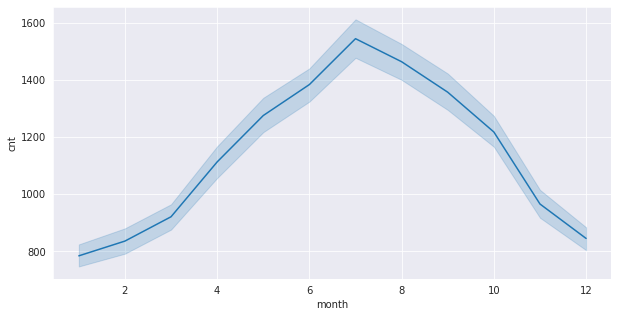

In [ ]:
# with lineplot


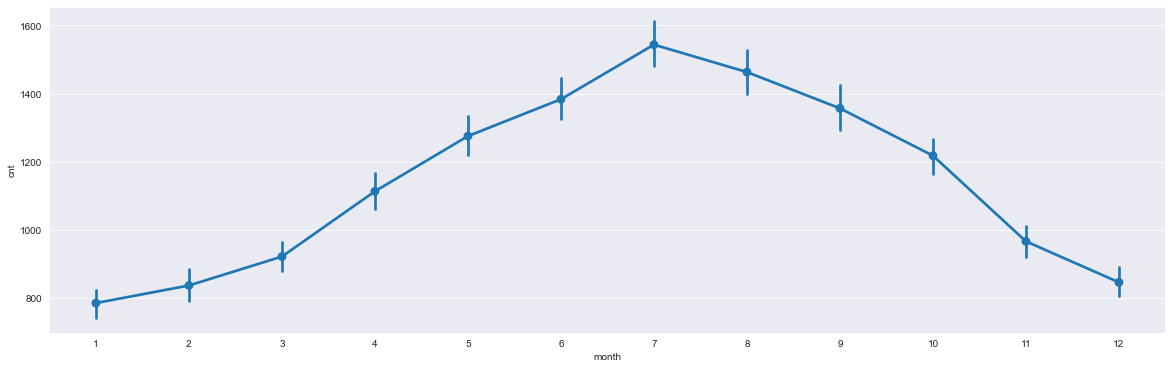

In [87]:
# with pointplot
plt.figure(figsize=(20,6))
sns.pointplot(x='month',y='cnt',data=df);

<AxesSubplot:xlabel='month', ylabel='cnt'>

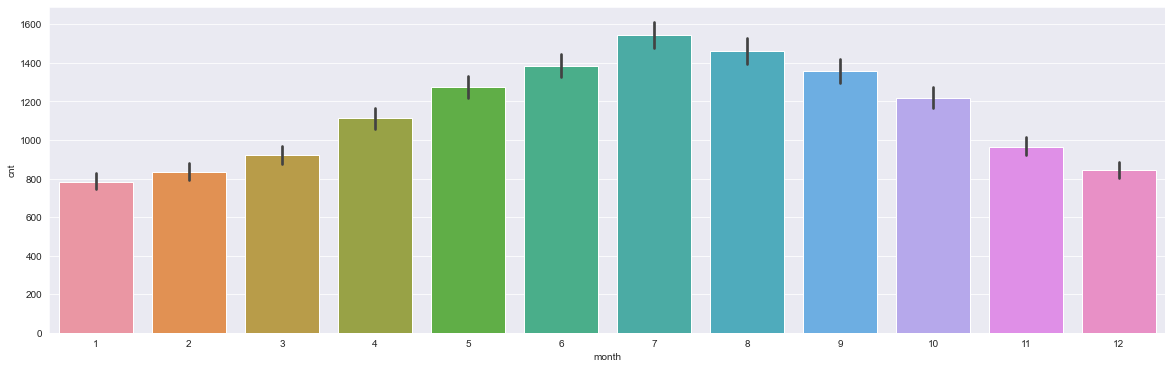

In [88]:
# with barplot
plt.figure(figsize=(20,6))
sns.barplot(x='month',y='cnt',data=df)


### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

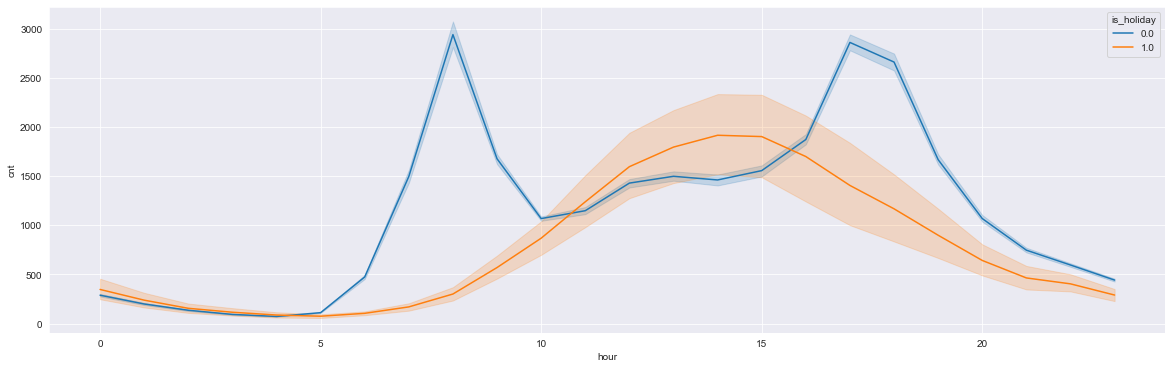

In [90]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(20,6))
sns.lineplot(x='hour',y='cnt',data=df, hue='is_holiday')


<AxesSubplot:xlabel='hour', ylabel='cnt'>

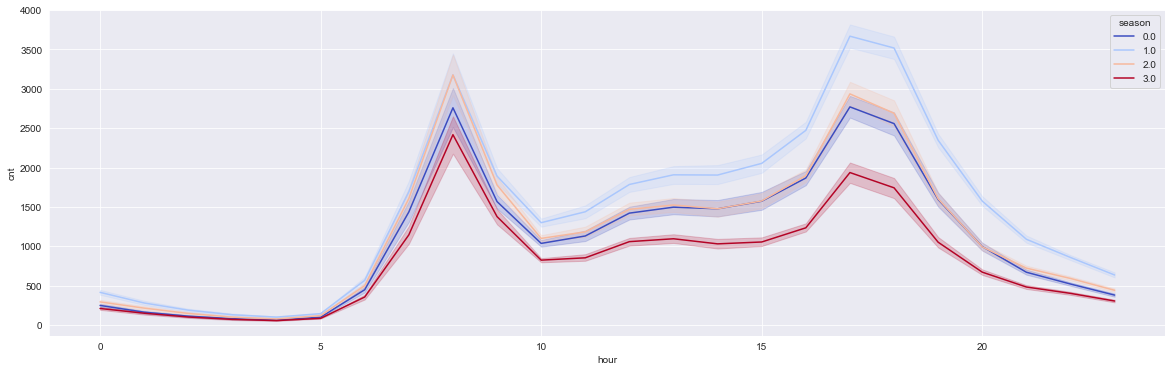

In [92]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(20,6))
sns.lineplot(x='hour',y='cnt',data=df, hue='season',palette='coolwarm')


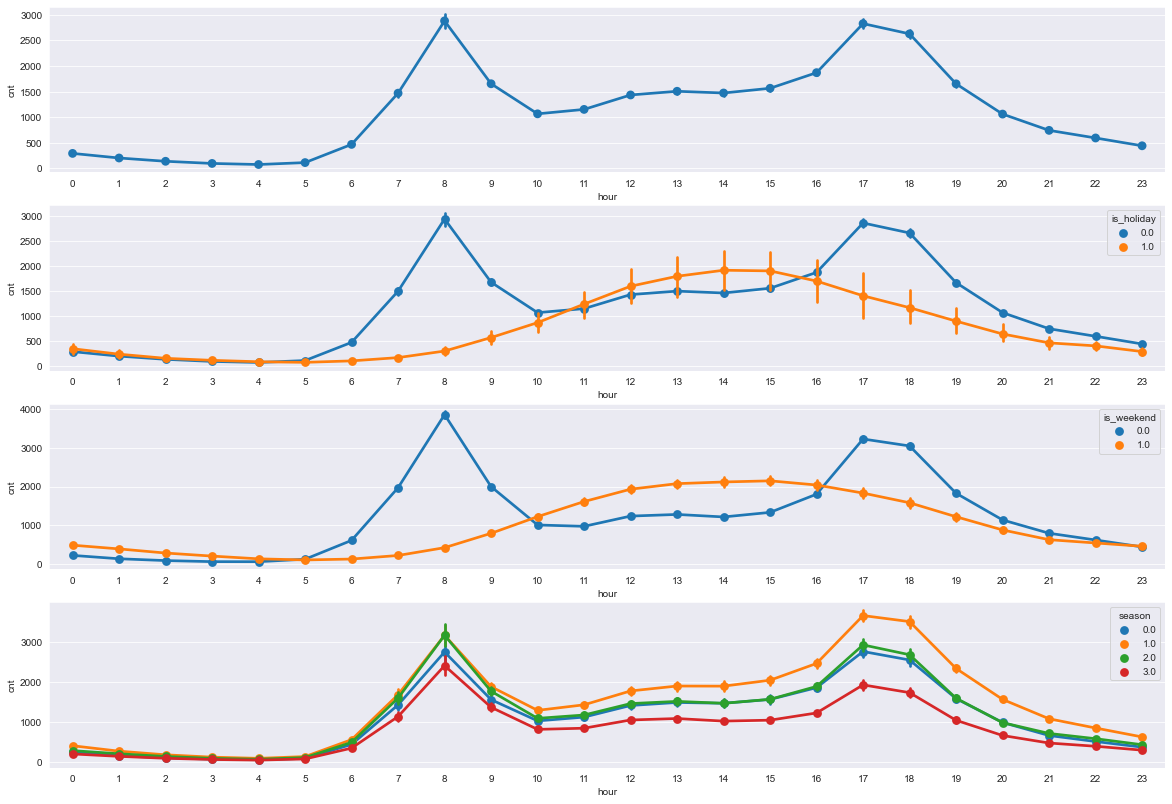

In [98]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4, figsize=(20,14))
sns.pointplot(x='hour', y='cnt', data=df, ax=ax1)
sns.pointplot(x='hour', y='cnt', data=df, hue='is_holiday', ax=ax2)
sns.pointplot(x='hour', y='cnt', data=df, hue='is_weekend', ax=ax3)
sns.pointplot(x='hour', y='cnt', data=df, hue='season', ax=ax4);


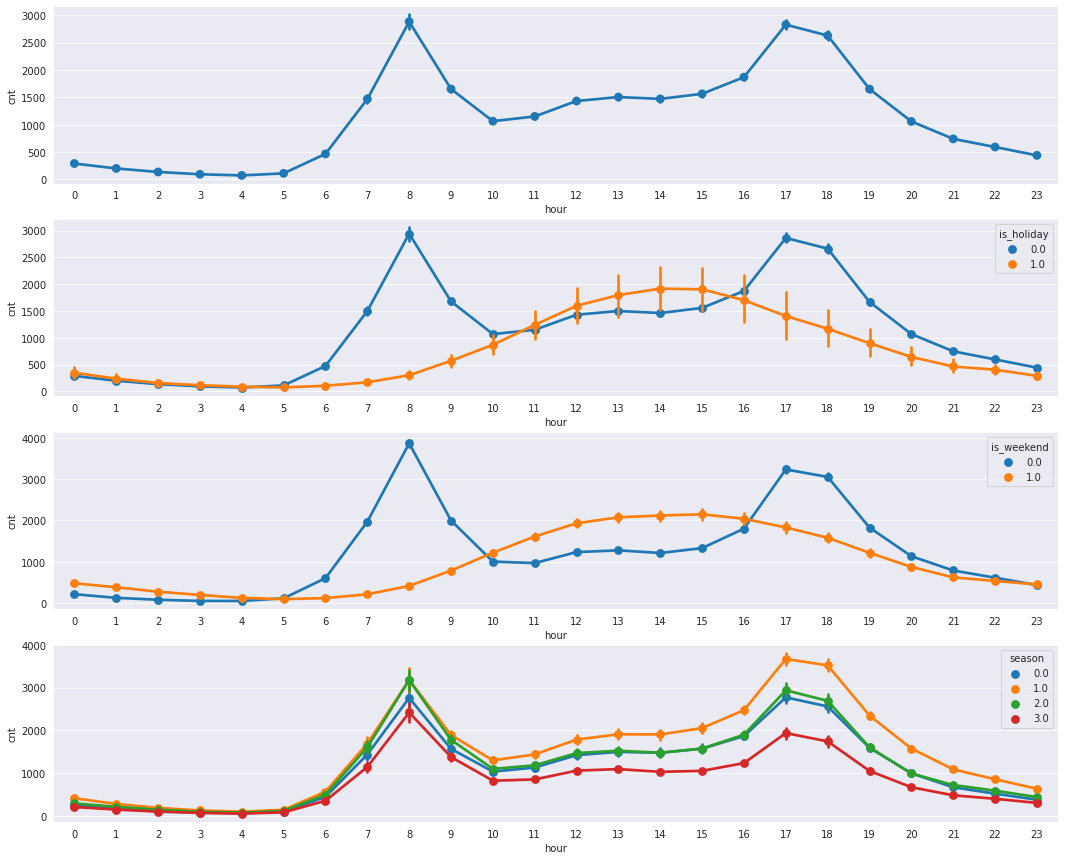

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

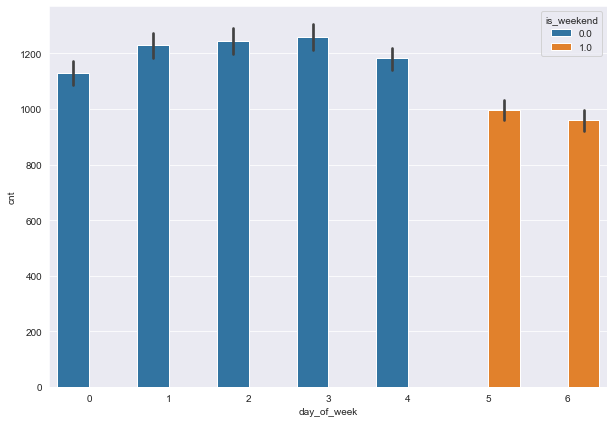

In [99]:
# with barplot
plt.figure(figsize=(10,7))
sns.barplot(x='day_of_week',y='cnt',data=df,hue='is_weekend')


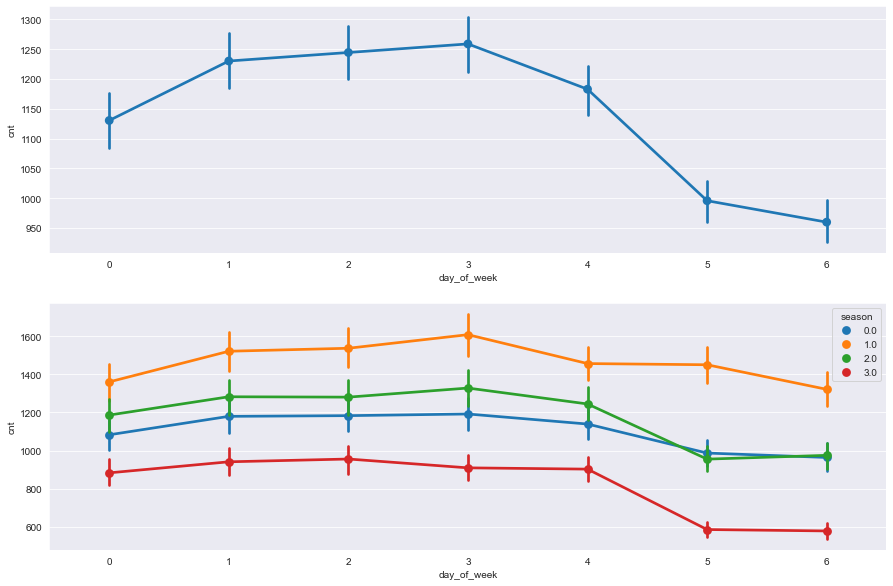

In [103]:
# with pointplot
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(15,10))
sns.pointplot(x='day_of_week', y='cnt', data=df, ax=ax1)
sns.pointplot(x='day_of_week', y='cnt', data=df, ax=ax2, hue='season');


### 13.Plot bike shares by day of month

In [110]:
sns.set_style('darkgrid')

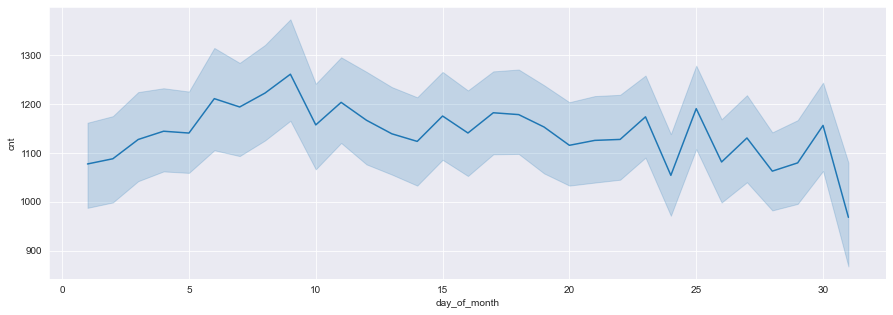

In [114]:
# with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x='day_of_month',y='cnt',data=df);



In [109]:
df.groupby(['day_of_month'])['cnt'].mean()

day_of_month
1     1077.455652
2     1088.117754
3     1127.602837
4     1144.492174
5     1140.772727
6     1211.227431
7     1194.151832
8     1222.696491
9     1261.260870
10    1157.453913
11    1203.618467
12    1166.952212
13    1139.221441
14    1123.670139
15    1175.629565
16    1140.871080
17    1182.311847
18    1178.552632
19    1153.147826
20    1115.667832
21    1125.729167
22    1127.717014
23    1173.994792
24    1054.147950
25    1190.786087
26    1081.516637
27    1130.681979
28    1062.750871
29    1079.680581
30    1156.406844
31     968.187311
Name: cnt, dtype: float64

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot:xlabel='year', ylabel='cnt'>

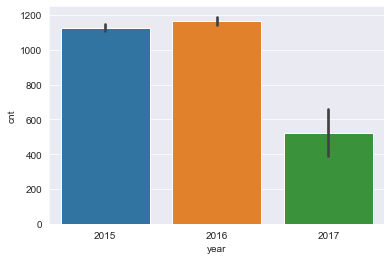

In [116]:
# with barplot
sns.barplot(x='year',y='cnt',data=df)

In [115]:
df.groupby(['year'])['cnt'].count()

year
2015    8643
2016    8699
2017      72
Name: cnt, dtype: int64

<AxesSubplot:xlabel='season', ylabel='cnt'>

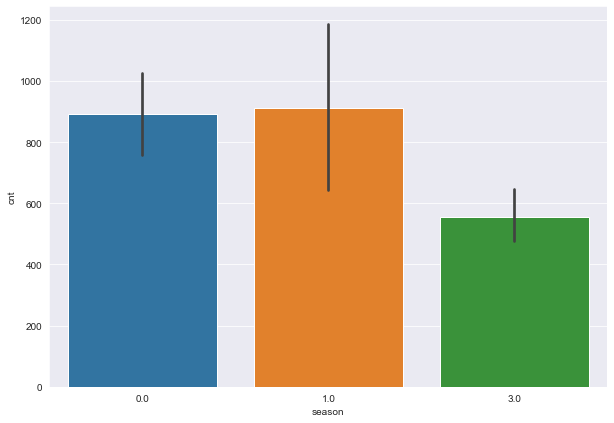

In [118]:
plt.figure(figsize=(10,7))
sns.barplot(x='season',y='cnt',data=df[df['is_holiday']==1])


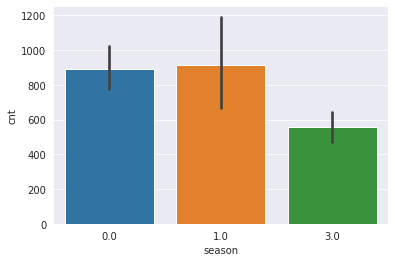

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [119]:
df['is_weekend'].unique()

array([1., 0.])

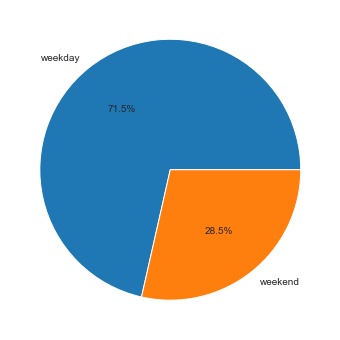

In [122]:
# pie chart
fig,ax1 = plt.subplots(figsize=(6,6))
ax1.pie(x=df['is_weekend'].value_counts().values,labels=['weekday','weekend'],autopct= '%1.1f%%', )
plt.show()

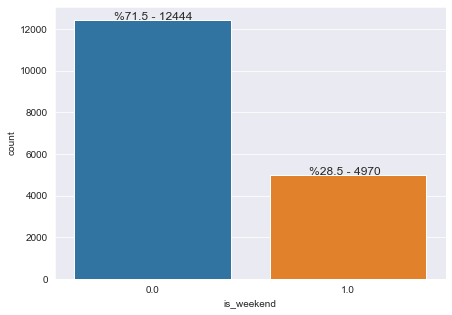

In [123]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches:
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ),
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

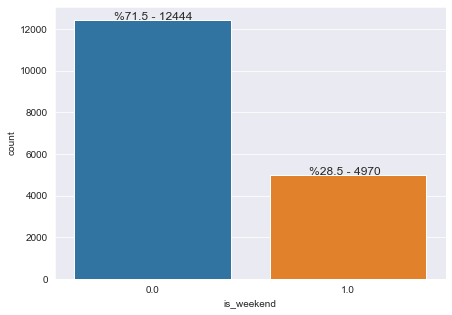

In [124]:
# with countplot
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches:
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ),
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)


### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

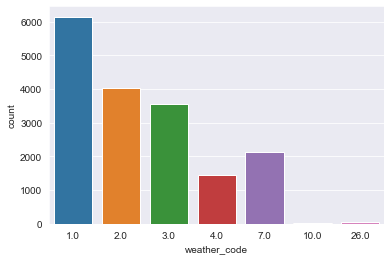

In [126]:
# with countplot
sns.countplot(x='weather_code',data=df)

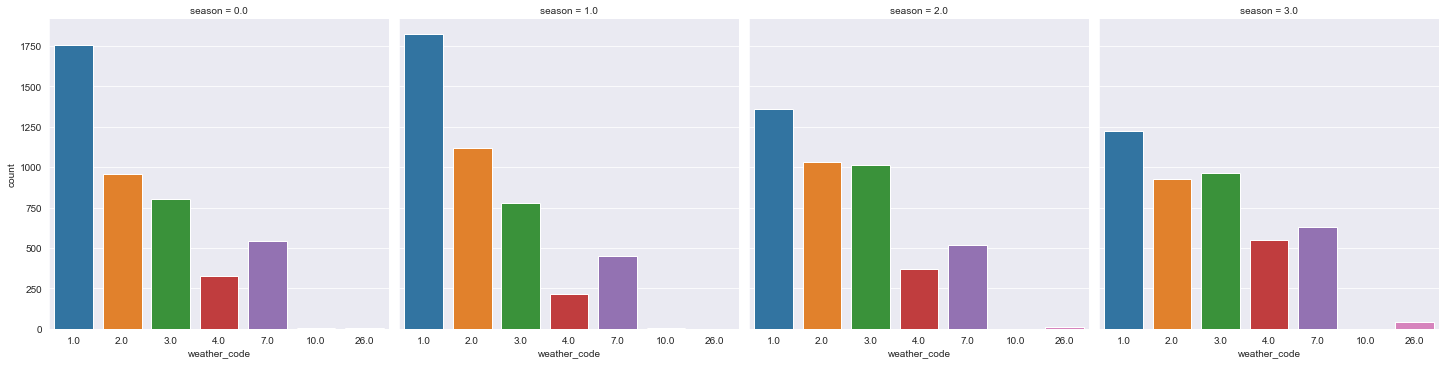

In [129]:
# with catplot
g = sns.catplot(x='weather_code',col='season',data=df,kind='count')

### 17.Visulaize all the continuous variables with histogram and scatterplot

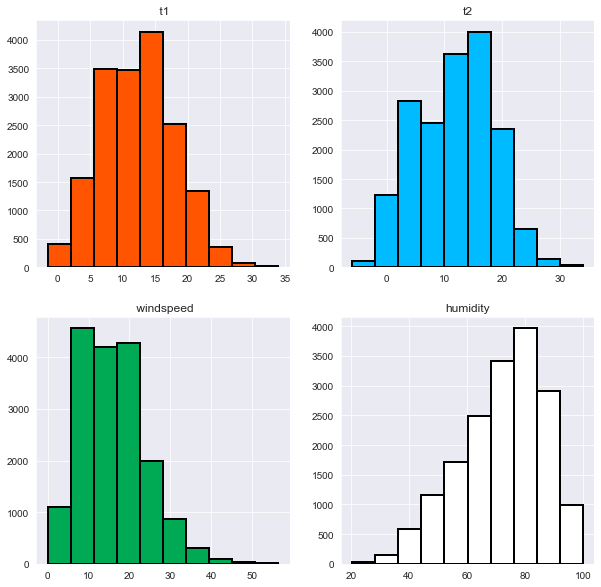

In [127]:
# matplotlip hist
fig,axes=plt.subplots(2,2, figsize=(10,10))
axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#FF5500')
axes[0,0].set_title(" t1")
axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color='#00BBFF')
axes[0,1].set_title("t2")
axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color='#00AA55')
axes[1,0].set_title(" windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#FFFFFF')
axes[1,1].set_title("humidity")
plt.show()


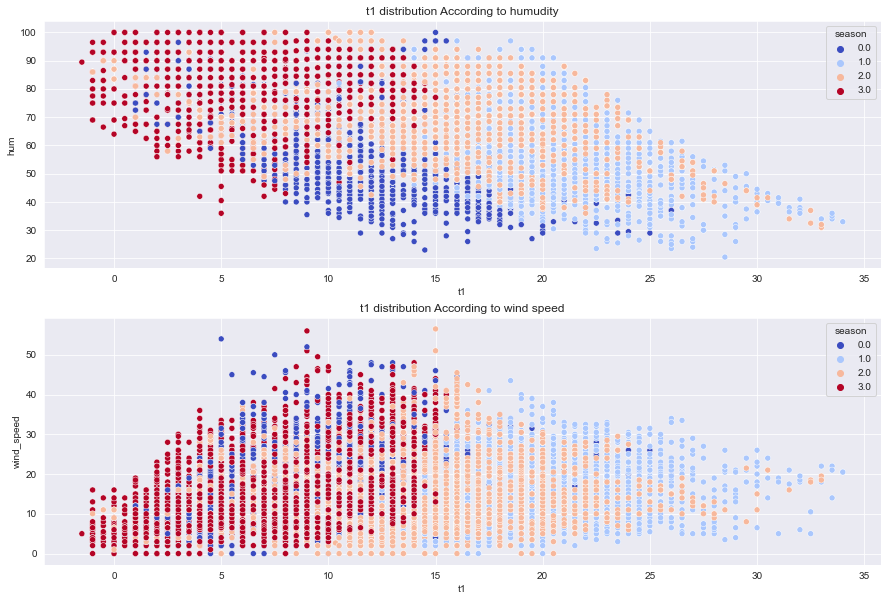

In [130]:
# matplotlib scatterplot
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")
plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___